In [11]:
"""
A simple neural network learning the XOR function
"""
import tensorflow as tf
sess = tf.InteractiveSession()

# Desired input output mapping of XOR function:
x_ = [[0, 0], [0, 1], [1, 0], [1, 1]] # input
#labels=[0,      1,      1,      0]   # output =>
expect=[[1,0],  [0,1],  [0,1], [1,0]] # ONE HOT REPRESENTATION! 'class' [1,0]==0 [0,1]==1

# x = tf.Variable(x_)
x = tf.placeholder("float", [None,2]) #  can we feed directly?
y_ = tf.placeholder("float", [None, 2]) # two output classes

number_hidden_nodes = 20 # 20 outputs to create some room for negatives and positives

W = tf.Variable(tf.random_uniform([2, number_hidden_nodes], -.01, .01))
b = tf.Variable(tf.random_uniform([number_hidden_nodes], -.01, .01))
hidden  = tf.nn.relu(tf.matmul(x,W) + b) # first layer.

 # the XOR function is the first nontrivial function, for which a two layer network is needed.
W2 = tf.Variable(tf.random_uniform([number_hidden_nodes,2], -.1, .1))
b2 = tf.Variable(tf.zeros([2]))
hidden2 = tf.matmul(hidden, W2)#+b2

y = tf.nn.softmax(hidden2)


# Define loss and optimizer
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(cross_entropy)

# Test trained model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1)) # argmax along dim-1
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) # [True, False, True, True] -> [1,0,1,1] -> 0.75.

# Train
tf.global_variables_initializer().run()
for epoch in range(1000):
    feed_dict={x: x_, y_:expect } # feed the net with our inputs and desired outputs.
    e,_=sess.run([cross_entropy,train_step],feed_dict)
    if e<1:break # early stopping yay
    if epoch%100==0:
        feed_dict={x: x_, y_:expect } # feed the net with our inputs and desired outputs.
        a, e,_=sess.run([accuracy, cross_entropy,train_step],feed_dict)
        print("Iter: {} : acc: {:.2f} loss:{}".format(epoch,e, a)) # error/loss should decrease over time

print("accuracy %s"%(accuracy.eval({x: x_, y_: expect})))

learned_output=tf.argmax(y,1)
print(learned_output.eval({x: x_}))

Iter: 0 : acc: 2.77 loss:0.5
accuracy 1.0
[0 1 1 0]


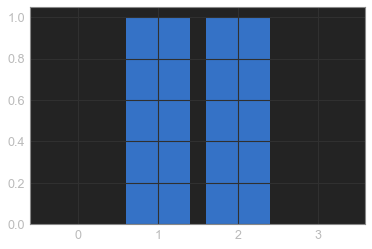

In [12]:
y_out = tf.argmax(y.eval(feed_dict={x:x_}),axis=1).eval()


import numpy as np
import matplotlib.pyplot as plt

xx = np.array([0,1,2,3])

plt.bar(xx, y_out)
plt.show()